***Jimena Lezcano Pintos - Open Data Project***

# **Exploración de Datos Abiertos en Paraguay**

### **Introducción a los datos abiertos**





>  Los datos abiertos (Open Data) también conocidos como datos públicos son datos que se encuentran disponibles de manera libre y gratuita para ser utilizado por cualquier persona. Los datos abiertos y disponibles para el público en general, la misma no tiene restricciones de acceso, de uso o redistribución. Los datos pueden encontrarse en muchos formatos y tienen potencial para impulsar sectores y beneficiar a la investigación, la ciencia, la educación, la tecnología y la salud, entre otros.
  Además de los sectores beneficiados, los datos abiertos en el contexto de Paraguay y siendo más específicos en el gobierno, pueden ayudar a mejorar la transparencia, la responsabilidad y la participación ciudadana, ya que los ciudadanos tienen acceso a los datos y a información valiosa para tomar decisiones informadas.
  Como antes mencionado los datos abiertos respaldan la supervisión pública de los Gobiernos y ayudan a reducir la corrupción, en Paraguay aún no se tiene completo los dataset establecidos por las diferentes organizaciones de Latinoamérica y del Mundo, lo que podría ser un poco desconcertante ya que no se podría tener acceso o supervision de esas areas de los datos.


**Identificación de fuentes de datos abiertos en Paraguay**

El Gobierno de Paraguay cuenta con varios portales de fuentes de datos abiertos que son relevantes y podrían ser utilizadas para investigación, análisis y desarrollo.

**Lista de portales y fuentes:**

*   Datos.gov.py
*   Justicia Electoral (TSJE)
*   Ministerio de Educación
*   Contrataciones Públicas (DNCP)
*   Ministerio de Salud
*   Senavitat
*   Ministerio de Hacienda
*   Portal de SENAC





### **Descarga y preparación de datos**

**Descarga**

La base selecionada para la descarga es la Deuda pública obtenida desde el sitio web de Datos Abiertos del Ministerio de Hacienda de Paraguay. Enlace al portal: (https://datos.hacienda.gov.py/data/deuda-publica/descargas)

La elección de esta base de datos se debe a que contiene una recopilación completa de los archivos mensuales de las deudas públicas del gobierno para el año mencionado. Esto permite tener un conjunto de datos completos y representativos para realizar análisis y exploraciones posteriores.

Es importante destacar que la fuente de datos seleccionada es confiable y proveniente de una entidad gubernamental, lo que brinda mayor credibilidad y respaldo a la información recopilada. Al contar con archivos mensuales, se puede obtener una visión detallada de la evolución de la deuda pública a lo largo del año 2022 y realizar un análisis temporal más preciso.



*   Importante: Se escogió una base de datos que contiene todos los archivos por mes del año 2022 de las deudas públicas del gobierno de Paraguay.






**Preparación de datos**

La preparación de datos implica hacer cambios en los datos originales para que estén listos para su análisis o modelado. Durante esta etapa, se realizan diversas tareas como limpiar los datos, corregir errores, organizar las variables, llenar datos faltantes y asegurarse de que los datos sean consistentes y correctos. El objetivo es tener datos completos y en el formato adecuado para su análisis posterior.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [68]:
#Importamos el archivo csv
uploaded_files = files.upload()

Saving deuda-publica_2022-01.csv to deuda-publica_2022-01 (1).csv
Saving deuda-publica_2022-02.csv to deuda-publica_2022-02 (1).csv
Saving deuda-publica_2022-03.csv to deuda-publica_2022-03 (1).csv
Saving deuda-publica_2022-04.csv to deuda-publica_2022-04 (1).csv
Saving deuda-publica_2022-05.csv to deuda-publica_2022-05 (1).csv
Saving deuda-publica_2022-06.csv to deuda-publica_2022-06 (1).csv
Saving deuda-publica_2022-07.csv to deuda-publica_2022-07 (1).csv
Saving deuda-publica_2022-08.csv to deuda-publica_2022-08 (1).csv
Saving deuda-publica_2022-09.csv to deuda-publica_2022-09 (1).csv
Saving deuda-publica_2022-10.csv to deuda-publica_2022-10 (1).csv
Saving deuda-publica_2022-11.csv to deuda-publica_2022-11 (1).csv
Saving deuda-publica_2022-12.csv to deuda-publica_2022-12 (1).csv


In [69]:
lista_dataframes = []
for filename in uploaded_files.keys():
  # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv(filename, encoding='latin1')
    lista_dataframes.append(df)
# Combinar los DataFrames en uno solo
datos_combinados = pd.concat(lista_dataframes, ignore_index=True)

In [70]:
print(datos_combinados.head())

  categoriaDeuda categoriaDeudor categoriaInteresTramo monedaBasePrestamo  \
0      PRÉSTAMOS         PÚBLICO         LIBOR 6 MESES                USD   
1      PRÉSTAMOS         PÚBLICO         LIBOR 6 MESES                USD   
2      PRÉSTAMOS         PÚBLICO         LIBOR 6 MESES                USD   
3      PRÉSTAMOS         PÚBLICO                  FIJA                USD   
4      PRÉSTAMOS         PÚBLICO                  FIJA                USD   

  monedaTramo descripcionTipoAdministracion              deudor  \
0         USD        ADMINISTRACION CENTRAL  REPUBLICA PARAGUAY   
1         USD        ADMINISTRACION CENTRAL  REPUBLICA PARAGUAY   
2         USD        ADMINISTRACION CENTRAL  REPUBLICA PARAGUAY   
3         USD        ADMINISTRACION CENTRAL  REPUBLICA PARAGUAY   
4         USD        ADMINISTRACION CENTRAL  REPUBLICA PARAGUAY   

              duracion fechaFinalProgramada fechaInicialProgramada  ...  \
0  MEDIANO/LARGO-PLAZO           2011-04-26             200

In [71]:
datos_combinados.to_csv('/content/deudas_2022.csv', index=False)

In [72]:
##para convertir a dataframe el archivo que subimos a memoria
df = pd.DataFrame(datos_combinados)
df.head()

,categoriaDeuda,categoriaDeudor,categoriaInteresTramo,monedaBasePrestamo,monedaTramo,descripcionTipoAdministracion,deudor,duracion,fechaFinalProgramada,fechaInicialProgramada,...,tipoAcreedor,tipoComisionPrestamo,tipoComisionTramo,tipoFinanciamiento,mesCorte,anioCorte,fechaCorte,fechaLey,agenciasImplantacion,leyNumero
0,PRÉSTAMOS,PÚBLICO,LIBOR 6 MESES,USD,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-04-26,2005-04-26,...,MULTILATERAL,COMISIÓN DE COMPROMISO,NaN,NaN,1,2022,2022-02-21,2000-05-22,MIN. OBRAS PUB/COM.,LEY 1684 / 25.04.01
1,PRÉSTAMOS,PÚBLICO,LIBOR 6 MESES,USD,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-04-26,2006-04-26,...,MULTILATERAL,COMISIÓN DE COMPROMISO,NaN,NaN,1,2022,2022-02-21,2000-05-22,MIN. OBRAS PUB/COM.,LEY 1684 / 25.04.01
2,PRÉSTAMOS,PÚBLICO,LIBOR 6 MESES,USD,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-10-26,2006-04-26,...,MULTILATERAL,COMISIÓN DE COMPROMISO,NaN,NaN,1,2022,2022-02-21,2000-05-22,MIN. OBRAS PUB/COM.,LEY 1684 / 25.04.01
3,PRÉSTAMOS,PÚBLICO,FIJA,USD,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2028-07-13,1999-01-13,...,BILATERAL,COMISIÓN DE COMPROMISO,NaN,NaN,1,2022,2022-02-21,1997-11-24,MIN. DE SALUD PUB/BS,LEY 1271 / 22.06.98
4,PRÉSTAMOS,PÚBLICO,FIJA,USD,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2035-04-15,2012-10-15,...,MULTILATERAL,COMISIÓN DE COMPROMISO,NaN,NaN,1,2022,2022-02-21,2010-03-20,SENASA,LEY 4454 / 04.10.11


In [73]:
# Verificar el número de filas y columnas
num_filas, num_columnas = df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

# Obtener información sobre los tipos de datos de cada columna
info_datos = df.info()
print(info_datos)

Número de filas: 9668
Número de columnas: 46
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoriaDeuda                 9668 non-null   object 
 1   categoriaDeudor                9668 non-null   object 
 2   categoriaInteresTramo          9668 non-null   object 
 3   monedaBasePrestamo             9668 non-null   object 
 4   monedaTramo                    9668 non-null   object 
 5   descripcionTipoAdministracion  9668 non-null   object 
 6   deudor                         9668 non-null   object 
 7   duracion                       9668 non-null   object 
 8   fechaFinalProgramada           9637 non-null   object 
 9   fechaInicialProgramada         9637 non-null   object 
 10  fechaLimiteDesembolso          9668 non-null   object 
 11  fechaPrimerPagoComision        3502 non-null   object 
 12  fec

In [74]:
#elimar columnas LIMPIEZA
df = df.drop(["leyNumero","tipoComisionPrestamo","tipoFinanciamiento" ,"agenciasImplantacion","fechaLey", "fechaCorte", "grupoTasaInteres","gestionTramo", "monedaTramo","montoTramo", "fechaLimiteDesembolso","fechaPrimerPagoInteres", "fechaUltimoPagoInteres","anioCorte", "mesCorte","identificadorAutorizacion", "grupoVencimiento","categoriaInteresTramo", "fechaPrimerPagoComision","fechaPrimerPagoPrincipal", "fechaUltimoPagoComision","fechaUltimoPagoPrincipal", "numeroTramo", "referenciaAcreedor","tipoComisionTramo","numeroPrestamo"], axis=1)

In [75]:
# Verificar el número de filas y columnas
num_filas, num_columnas = df.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

# Obtener información sobre los tipos de datos de cada columna
info_datos = df.info()
print(info_datos)

Número de filas: 9668
Número de columnas: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoriaDeuda                 9668 non-null   object 
 1   categoriaDeudor                9668 non-null   object 
 2   monedaBasePrestamo             9668 non-null   object 
 3   descripcionTipoAdministracion  9668 non-null   object 
 4   deudor                         9668 non-null   object 
 5   duracion                       9668 non-null   object 
 6   fechaFinalProgramada           9637 non-null   object 
 7   fechaInicialProgramada         9637 non-null   object 
 8   fuenteDeuda                    9668 non-null   object 
 9   garantiaPublica                9668 non-null   object 
 10  tipoPrestamo                   9668 non-null   object 
 11  institucionPagadora            9668 non-null   object 
 12  mon

Normalizar formatos de datos: Si hay columnas con formatos inconsistentes o que necesitan ser convertidos a un formato específico, puedes utilizar métodos de Pandas para realizar estas transformaciones. Por ejemplo, si deseas convertir la columna "fechaCorte" en formato de fecha, puedes hacer lo siguiente:

Separar las columnas de fechaFinalProgramada y fechaInicialProgramada en columnas individuales de año, mes y día, y luego convertirlas a tipo float, puedes seguir estos pasos:

In [76]:
df["fechaFinalProgramada"] = pd.to_datetime(df["fechaFinalProgramada"])
df["fechaInicialProgramada"] = pd.to_datetime(df["fechaInicialProgramada"])

In [77]:
# Crear columnas separadas de año, mes y día para la fecha inicial programada
df['anhoInicial'] = df['fechaInicialProgramada'].dt.year.astype(float)
df['mesInicial'] = df['fechaInicialProgramada'].dt.month.astype(float)
df['diaInicial'] = df['fechaInicialProgramada'].dt.day.astype(float)

# Crear columnas separadas de año, mes y día para la fecha final programada
df['anhoFinal'] = df['fechaFinalProgramada'].dt.year.astype(float)
df['mesFinal'] = df['fechaFinalProgramada'].dt.month.astype(float)
df['diaFinal'] = df['fechaFinalProgramada'].dt.day.astype(float)

In [78]:
df

,categoriaDeuda,categoriaDeudor,monedaBasePrestamo,descripcionTipoAdministracion,deudor,duracion,fechaFinalProgramada,fechaInicialProgramada,fuenteDeuda,garantiaPublica,...,periodoGracia,situacion,tasaInteres,tipoAcreedor,anhoInicial,mesInicial,diaInicial,anhoFinal,mesFinal,diaFinal
0,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-04-26,2005-04-26,EXTERNA,NO GARANTIZADO,...,4y 11m 4d,ACTIVO,3.725,MULTILATERAL,2005.0,4.0,26.0,2011.0,4.0,26.0
1,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-04-26,2006-04-26,EXTERNA,NO GARANTIZADO,...,5y 11m 4d,ACTIVO,3.725,MULTILATERAL,2006.0,4.0,26.0,2011.0,4.0,26.0
2,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-10-26,2006-04-26,EXTERNA,NO GARANTIZADO,...,5y 11m 4d,ACTIVO,3.725,MULTILATERAL,2006.0,4.0,26.0,2011.0,10.0,26.0
3,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2028-07-13,1999-01-13,EXTERNA,NO GARANTIZADO,...,10y 7m 19d,ACTIVO,1.030,BILATERAL,1999.0,1.0,13.0,2028.0,7.0,13.0
4,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2035-04-15,2012-10-15,EXTERNA,NO GARANTIZADO,...,7y 0m 26d,ACTIVO,2.710,MULTILATERAL,2012.0,10.0,15.0,2035.0,4.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2034-05-31,2020-05-31,EXTERNA,NO GARANTIZADO,...,6y 6m 19d,ACTIVO,7.520,BANCO COMERCIAL U OTRA INSTITUCIÓN FINANCIERA,2020.0,5.0,31.0,2034.0,5.0,31.0
9664,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2034-05-31,2021-11-30,EXTERNA,NO GARANTIZADO,...,6y 6m 19d,ACTIVO,7.520,BANCO COMERCIAL U OTRA INSTITUCIÓN FINANCIERA,2021.0,11.0,30.0,2034.0,5.0,31.0
9665,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2032-06-09,2022-12-09,INTERNA,NO GARANTIZADO,...,4y 3m 0d,ACTIVO,5.571,BANCO COMERCIAL U OTRA INSTITUCIÓN FINANCIERA,2022.0,12.0,9.0,2032.0,6.0,9.0
9666,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2032-06-09,2022-12-09,INTERNA,NO GARANTIZADO,...,4y 3m 0d,ACTIVO,5.571,BANCO COMERCIAL U OTRA INSTITUCIÓN FINANCIERA,2022.0,12.0,9.0,2032.0,6.0,9.0


In [79]:
df.isnull()
# Retorna un valor booleano, si el valor es NaN = True, caso contrario es False

,categoriaDeuda,categoriaDeudor,monedaBasePrestamo,descripcionTipoAdministracion,deudor,duracion,fechaFinalProgramada,fechaInicialProgramada,fuenteDeuda,garantiaPublica,...,periodoGracia,situacion,tasaInteres,tipoAcreedor,anhoInicial,mesInicial,diaInicial,anhoFinal,mesFinal,diaFinal
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9664,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9665,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9666,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
df.isnull().sum()

categoriaDeuda                     0
categoriaDeudor                    0
monedaBasePrestamo                 0
descripcionTipoAdministracion      0
deudor                             0
duracion                           0
fechaFinalProgramada              31
fechaInicialProgramada            31
fuenteDeuda                        0
garantiaPublica                    0
tipoPrestamo                       0
institucionPagadora                0
montoPrestamo                      0
nombreBeneficiario               753
nombreAcreedor                     0
paisAcreedor                       0
periodoGracia                     12
situacion                          0
tasaInteres                      115
tipoAcreedor                       0
anhoInicial                       31
mesInicial                        31
diaInicial                        31
anhoFinal                         31
mesFinal                          31
diaFinal                          31
dtype: int64

In [81]:
# Reemplazamos los nan en intereses por un mean para no tener datos vacios.
mean_tasa_interes = df['tasaInteres'].mean()
df.loc[:, 'tasaInteres'].fillna(mean_tasa_interes, inplace=True)

In [82]:
df = df.dropna(subset=['fechaFinalProgramada'])

In [83]:
df = df.dropna(subset=['fechaInicialProgramada'])

In [84]:
valores_monedas = df['monedaBasePrestamo'].unique()
print(valores_monedas)

['USD' 'EUR' 'PYG' 'JPY' 'SDR' 'ZAR']


In [85]:
valor = 'SDR'
df.loc[df['monedaBasePrestamo'] == valor].count()

categoriaDeuda                   36
categoriaDeudor                  36
monedaBasePrestamo               36
descripcionTipoAdministracion    36
deudor                           36
duracion                         36
fechaFinalProgramada             36
fechaInicialProgramada           36
fuenteDeuda                      36
garantiaPublica                  36
tipoPrestamo                     36
institucionPagadora              36
montoPrestamo                    36
nombreBeneficiario               36
nombreAcreedor                   36
paisAcreedor                     36
periodoGracia                    36
situacion                        36
tasaInteres                      36
tipoAcreedor                     36
anhoInicial                      36
mesInicial                       36
diaInicial                       36
anhoFinal                        36
mesFinal                         36
diaFinal                         36
dtype: int64

A continuación se cambian los montos de las monedas para igualar a USD.

In [86]:
df = df[df['monedaBasePrestamo'] != 'SDR']

In [87]:
conversion_rates = {'EUR': 1.18, 'PYG': 0.00014, 'JPY': 0.0091, 'ZAR': 0.071}

df.loc[df['monedaBasePrestamo'] == 'EUR', 'montoPrestamo'] *= conversion_rates['EUR']
df.loc[df['monedaBasePrestamo'] == 'PYG', 'montoPrestamo'] *= conversion_rates['PYG']
df.loc[df['monedaBasePrestamo'] == 'JPY', 'montoPrestamo'] *= conversion_rates['JPY']
df.loc[df['monedaBasePrestamo'] == 'ZAR', 'montoPrestamo'] *= conversion_rates['ZAR']

Para cambiar los nombres de las variables 'EUR', 'PYG', 'JPY' y 'ZAR' a 'USD' en la columna 'monedaBasePrestamo', se utilizó el método replace de pandas.

In [88]:
df['monedaBasePrestamo'] = df['monedaBasePrestamo'].replace({'EUR': 'USD', 'PYG': 'USD', 'JPY': 'USD', 'ZAR': 'USD'})

<ipython-input-88-89b1d00d0836>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['monedaBasePrestamo'] = df['monedaBasePrestamo'].replace({'EUR': 'USD', 'PYG': 'USD', 'JPY': 'USD', 'ZAR': 'USD'})


In [89]:
valores_monedas = df['monedaBasePrestamo'].unique()
print(valores_monedas)

['USD']


In [90]:
datos_seleccionados = df[['montoPrestamo']]
print(datos_seleccionados)

      montoPrestamo
0      6.000000e+07
1      6.000000e+07
2      6.000000e+07
3      4.215260e+06
4      1.200000e+07
...             ...
9663   4.434737e+08
9664   4.434737e+08
9665   1.299603e+08
9666   1.299603e+08
9667   1.299603e+08

[9601 rows x 1 columns]


In [91]:
# nos deshacemos de esta vista '1.23082194e+07' y hacemos que sean numeros entendibles
pd.options.display.float_format = '{:.2f}'.format

In [92]:
datos_seleccionados = df[['periodoGracia']]
print(datos_seleccionados)

       periodoGracia
0       4y  11m   4d
1       5y  11m   4d
2       5y  11m   4d
3      10y   7m  19d
4       7y   0m  26d
...              ...
9663    6y   6m  19d
9664    6y   6m  19d
9665    4y   3m   0d
9666    4y   3m   0d
9667    4y   3m   0d

[9601 rows x 1 columns]


In [93]:
# Creamos una nueva columna trayendo solamente los años que duran los periodos de gracia
df.loc[:, 'anhosGracia'] = df['periodoGracia'].str.split('y').str[0]

<ipython-input-93-548230c868b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'anhosGracia'] = df['periodoGracia'].str.split('y').str[0]


In [94]:
datos_seleccionados = df[['anhosGracia']]
print(datos_seleccionados)

     anhosGracia
0              4
1              5
2              5
3             10
4              7
...          ...
9663           6
9664           6
9665           4
9666           4
9667           4

[9601 rows x 1 columns]


In [95]:
# Reemplazar los valores vacíos por NaN
df['anhosGracia'] = df['anhosGracia'].replace('', np.nan)

# Convertir la columna a tipo float64
df['anhosGracia'] = df['anhosGracia'].astype(float)

<ipython-input-95-c16154e0712d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anhosGracia'] = df['anhosGracia'].replace('', np.nan)
<ipython-input-95-c16154e0712d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anhosGracia'] = df['anhosGracia'].astype(float)


## Exploracion de los datos

La exploración de datos es una fase crucial en el proyecto, donde se analizan los datos de la deuda pública del gobierno de Paraguay. Se buscan patrones, tendencias y anomalías para obtener información útil mediante gráficos, tablas y estadísticas para visualizar los datos. Esta exploración ayudará a comprender mejor la deuda y tomar decisiones basadas en los hallazgos.

In [96]:
# Obtener información sobre los tipos de datos de cada columna
info_datos = df.info()
print(info_datos)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9601 entries, 0 to 9667
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   categoriaDeuda                 9601 non-null   object        
 1   categoriaDeudor                9601 non-null   object        
 2   monedaBasePrestamo             9601 non-null   object        
 3   descripcionTipoAdministracion  9601 non-null   object        
 4   deudor                         9601 non-null   object        
 5   duracion                       9601 non-null   object        
 6   fechaFinalProgramada           9601 non-null   datetime64[ns]
 7   fechaInicialProgramada         9601 non-null   datetime64[ns]
 8   fuenteDeuda                    9601 non-null   object        
 9   garantiaPublica                9601 non-null   object        
 10  tipoPrestamo                   9601 non-null   object        
 11  institucionPagado

In [97]:
df.head()

,categoriaDeuda,categoriaDeudor,monedaBasePrestamo,descripcionTipoAdministracion,deudor,duracion,fechaFinalProgramada,fechaInicialProgramada,fuenteDeuda,garantiaPublica,...,situacion,tasaInteres,tipoAcreedor,anhoInicial,mesInicial,diaInicial,anhoFinal,mesFinal,diaFinal,anhosGracia
0,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-04-26,2005-04-26,EXTERNA,NO GARANTIZADO,...,ACTIVO,3.73,MULTILATERAL,2005.00,4.00,26.00,2011.00,4.00,26.00,4.00
1,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-04-26,2006-04-26,EXTERNA,NO GARANTIZADO,...,ACTIVO,3.73,MULTILATERAL,2006.00,4.00,26.00,2011.00,4.00,26.00,5.00
2,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2011-10-26,2006-04-26,EXTERNA,NO GARANTIZADO,...,ACTIVO,3.73,MULTILATERAL,2006.00,4.00,26.00,2011.00,10.00,26.00,5.00
3,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2028-07-13,1999-01-13,EXTERNA,NO GARANTIZADO,...,ACTIVO,1.03,BILATERAL,1999.00,1.00,13.00,2028.00,7.00,13.00,10.00
4,PRÉSTAMOS,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2035-04-15,2012-10-15,EXTERNA,NO GARANTIZADO,...,ACTIVO,2.71,MULTILATERAL,2012.00,10.00,15.00,2035.00,4.00,15.00,7.00


In [98]:
datos_seleccionados = df[['montoPrestamo']]
print(datos_seleccionados)

      montoPrestamo
0       60000000.00
1       60000000.00
2       60000000.00
3        4215259.71
4       12000000.00
...             ...
9663   443473727.00
9664   443473727.00
9665   129960310.00
9666   129960310.00
9667   129960310.00

[9601 rows x 1 columns]


In [99]:
df.groupby('garantiaPublica').size()

garantiaPublica
GARANTIZADO       4879
NO GARANTIZADO    4722
dtype: int64

In [100]:
df.groupby('fuenteDeuda').size()

fuenteDeuda
EXTERNA    4726
INTERNA    4875
dtype: int64

In [101]:
df.groupby('nombreBeneficiario').size()

nombreBeneficiario
A N D E                  362
A. F. D.                1165
BCO. NAC. DE FOMENTO      24
C  A  H                   24
C  S  J                   12
C O N A V I               60
CONACYT                   24
COPACO S.A                12
DGEEC                     10
ESSAP S.A.                84
ESSAP SA                  36
F  D  I                   12
FONDO GANADERO            12
I P T A                    1
M  I  T  I  C             12
MIN. DE AGRIC/GANAD      438
MIN. DE DEFENSA NAC.     108
MIN. DE EDUC/CULTO       202
MIN. DE HACIENDA        3884
MIN. DE INTERIOR          48
MIN. DE RELAC. EXT.       12
MIN. DE SALUD PUB/BS     216
MIN. OBRAS PUB/COM.     1617
MIN.INDUSTRIA/COM         84
MIN.JUSTICIA/TRABAJO      60
S  T  P                   48
SECRET.FUNC. PÚBLICA      12
SENACSA                   12
SENASA                    72
SENATUR                   12
SENAVITAT                 12
SRIA. DE ACCION SOC.      36
UNIV. NAC.  ASUNCION     134
dtype: int64

In [102]:
df.groupby('institucionPagadora').size()

institucionPagadora
A N D E                  362
A. F. D.                1165
BCO. NAC. DE FOMENTO      12
C  A  H                   24
COPACO S.A                12
ESSAP S.A.                84
FONDO GANADERO            12
I P T A                    1
MIN. DE HACIENDA        7917
SENACSA                   12
dtype: int64

En la siguiente tabla se puede observar lo siguiente:

La cantidad promedio del préstamo es de aproximadamente 130,161,292.85 USD. El rango de los montos de préstamo va desde 25,539.45 USD hasta 1,000,000,000.00 USD.

La tasa de interés promedio es de aproximadamente 5.60%. El rango de las tasas de interés va desde 0.00% hasta 15.00%.

La duración media del período de gracia es de aproximadamente 6.56 años. El valor mínimo es de 1.00 año y el máximo es de 39.00 años. Esto indica que algunos préstamos tienen períodos de gracia prolongados, lo que puede afectar los pagos y la amortización de los préstamos.


In [103]:
df.describe()

,montoPrestamo,tasaInteres,anhoInicial,mesInicial,diaInicial,anhoFinal,mesFinal,diaFinal,anhosGracia
count,9601.00,9601.00,9601.00,9601.00,9601.00,9601.00,9601.00,9601.00,9577.00
mean,130161292.85,5.60,2009.82,6.59,18.81,2021.55,6.84,19.10,6.56
std,136368570.42,3.27,10.01,3.22,7.54,11.22,3.45,7.53,6.07
min,25539.45,0.00,1974.00,1.00,1.00,1999.00,1.00,1.00,1.00
25%,30113754.28,2.50,2006.00,4.00,15.00,2013.00,4.00,15.00,3.00
50%,93396800.00,5.59,2012.00,6.00,19.00,2018.00,6.00,20.00,5.00
75%,161000000.00,8.00,2016.00,9.00,26.00,2029.00,10.00,26.00,8.00
max,1000000000.00,15.00,2033.00,12.00,31.00,2054.00,12.00,31.00,39.00


A continuacion se puede ver que tenemos 744 registros en donde el nombre del beneficiario es null, lo que podria generar sospechas. Por ello se cambiaron estos valores nulos por "sin nombre" por que es interesante para los siguientes analisis.

In [104]:
df.isnull().sum()

categoriaDeuda                     0
categoriaDeudor                    0
monedaBasePrestamo                 0
descripcionTipoAdministracion      0
deudor                             0
duracion                           0
fechaFinalProgramada               0
fechaInicialProgramada             0
fuenteDeuda                        0
garantiaPublica                    0
tipoPrestamo                       0
institucionPagadora                0
montoPrestamo                      0
nombreBeneficiario               744
nombreAcreedor                     0
paisAcreedor                       0
periodoGracia                      0
situacion                          0
tasaInteres                        0
tipoAcreedor                       0
anhoInicial                        0
mesInicial                         0
diaInicial                         0
anhoFinal                          0
mesFinal                           0
diaFinal                           0
anhosGracia                       24
d

In [105]:
df['nombreBeneficiario'] = df['nombreBeneficiario'].fillna('sin nombre')

In [106]:
for datos_combinados in df.columns:
    unique_values = df[datos_combinados].nunique()
    print(f"La columna {datos_combinados} tiene {unique_values} valores únicos.")

La columna categoriaDeuda tiene 2 valores únicos.
La columna categoriaDeudor tiene 2 valores únicos.
La columna monedaBasePrestamo tiene 1 valores únicos.
La columna descripcionTipoAdministracion tiene 2 valores únicos.
La columna deudor tiene 8 valores únicos.
La columna duracion tiene 1 valores únicos.
La columna fechaFinalProgramada tiene 387 valores únicos.
La columna fechaInicialProgramada tiene 331 valores únicos.
La columna fuenteDeuda tiene 2 valores únicos.
La columna garantiaPublica tiene 2 valores únicos.
La columna tipoPrestamo tiene 3 valores únicos.
La columna institucionPagadora tiene 10 valores únicos.
La columna montoPrestamo tiene 180 valores únicos.
La columna nombreBeneficiario tiene 34 valores únicos.
La columna nombreAcreedor tiene 20 valores únicos.
La columna paisAcreedor tiene 12 valores únicos.
La columna periodoGracia tiene 378 valores únicos.
La columna situacion tiene 1 valores únicos.
La columna tasaInteres tiene 316 valores únicos.
La columna tipoAcreedor

### Graficos


> A continuación se realizarán diferentes tipos de gráficos como gráficos de barras, histogramas, diagramas de dispersión, etc., para comprender mejor los datos.




Gráfico de Barras sobre los mayores Beneficiarios por Suma de Monto de Préstamo. Esto nos permitirá conocer los beneficiarios con mayor suma de préstamos.

In [107]:
top_beneficiarios = df.groupby('nombreBeneficiario')['montoPrestamo'].sum().nlargest(5)

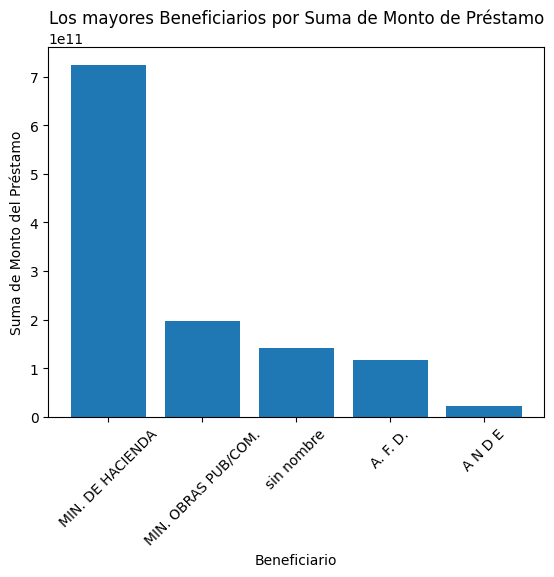

In [108]:
import matplotlib.pyplot as plt

plt.bar(top_beneficiarios.index, top_beneficiarios.values)

plt.xlabel('Beneficiario')
plt.ylabel('Suma de Monto del Préstamo')
plt.title('Los mayores Beneficiarios por Suma de Monto de Préstamo')
plt.xticks(rotation=45)

plt.show()




*   El beneficiario con mayor cantidad de deudas es el MIN. DE HACIENDA con una gran diferencia con los demás.

*   Se  puede observar tambien que la suma de los beneficiarios sin nombre se encuentran en el tercer puesto y suman una gran cantidad de dinero en cuanto a deudas.



Diagrama de dispersión en cuanto a la relación entre Monto del Préstamo y Tasa de Interés.

In [109]:
df.groupby('nombreBeneficiario')['montoPrestamo'].sum().nlargest(5)

nombreBeneficiario
MIN. DE HACIENDA      724567135475.44
MIN. OBRAS PUB/COM.   197289157804.56
sin nombre            141406550475.33
A. F. D.              116772227761.26
A N D E                21897422717.69
Name: montoPrestamo, dtype: float64

Diagrama de dispersion:

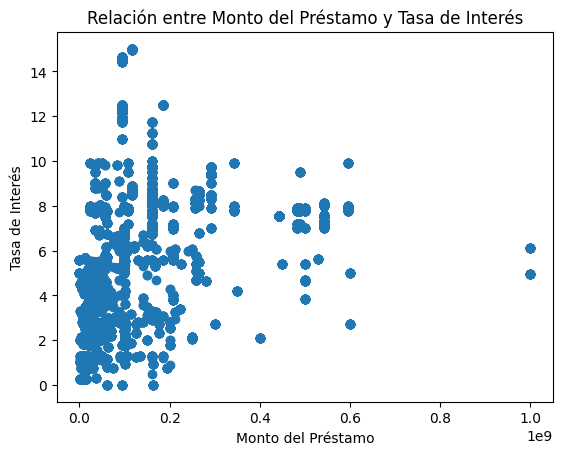

In [110]:
# Crear el diagrama de dispersión
plt.scatter(df['montoPrestamo'], df['tasaInteres'])

# Personalizar el gráfico
plt.xlabel('Monto del Préstamo')
plt.ylabel('Tasa de Interés')
plt.title('Relación entre Monto del Préstamo y Tasa de Interés')

# Mostrar el gráfico
plt.show()



*   En el diagrama de dispersión se puede observar que los datos se encuentran medianamente dispersos.



Diagrama de correlación la cual mostrará la relación entre pares de variables en un conjunto de datos

In [111]:
#Correlation
df.corr()

<ipython-input-111-7e6697e05da5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,montoPrestamo,tasaInteres,anhoInicial,mesInicial,diaInicial,anhoFinal,mesFinal,diaFinal,anhosGracia
montoPrestamo,1.00,0.41,0.47,0.07,0.15,0.09,-0.17,0.16,-0.13
tasaInteres,0.41,1.00,0.34,0.10,0.13,-0.37,0.00,0.13,-0.42
anhoInicial,0.47,0.34,1.00,0.10,0.04,0.46,0.04,0.06,-0.12
mesInicial,0.07,0.10,0.10,1.00,0.12,-0.03,-0.16,0.10,-0.11
diaInicial,0.15,0.13,0.04,0.12,1.00,-0.15,-0.08,0.95,-0.10
anhoFinal,0.09,-0.37,0.46,-0.03,-0.15,1.00,0.01,-0.15,0.47
mesFinal,-0.17,0.00,0.04,-0.16,-0.08,0.01,1.00,-0.08,-0.05
diaFinal,0.16,0.13,0.06,0.10,0.95,-0.15,-0.08,1.00,-0.11
anhosGracia,-0.13,-0.42,-0.12,-0.11,-0.10,0.47,-0.05,-0.11,1.00


<ipython-input-112-a7434eca7f55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

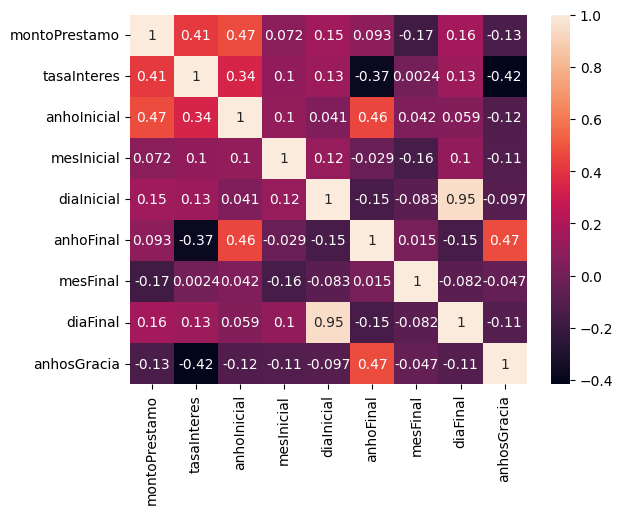

In [112]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)



*   Los resultados de la matriz de correlación indican la relación lineal entre las variables del conjunto de datos. Aquí hay algunos puntos importantes que se pueden destacar:


> El monto del préstamo (montoPrestamo) muestra una correlación positiva moderada con la tasa de interés (tasaInteres) y el año inicial (anhoInicial). Esto sugiere que a medida que aumenta el monto del préstamo, es probable que también aumenten la tasa de interés y el año inicial del préstamo.



> La tasa de interés (tasaInteres) muestra una correlación negativa moderada con los años de gracia (anhosGracia). Esto indica que a medida que la tasa de interés aumenta, es probable que los años de gracia disminuyan.



> Existe una correlación negativa débil entre el monto del préstamo (montoPrestamo) y los años de gracia (anhosGracia). Esto sugiere que a medida que aumenta el monto del préstamo, es probable que disminuyan los años de gracia.



> Existe una correlación negativa débil entre el mes inicial (mesInicial) y el mes final (mesFinal). Esto podría indicar una posible relación en la duración de los préstamos entre estos dos meses.




Histograma

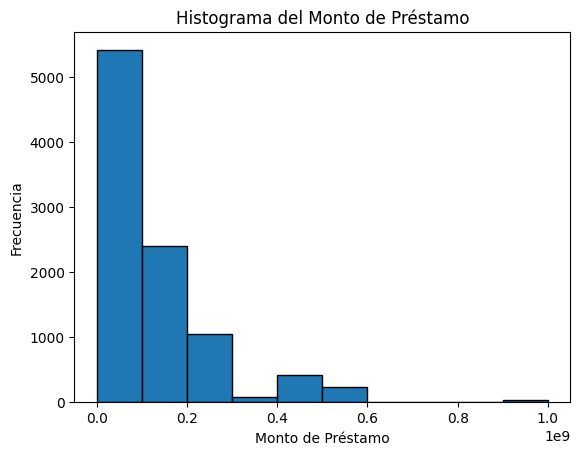

In [113]:
import matplotlib.pyplot as plt

# Obtener los valores del monto de préstamo
montos = df['montoPrestamo']

# Crear el histograma
plt.hist(montos, bins=10, edgecolor='black')
plt.title('Histograma del Monto de Préstamo')
plt.xlabel('Monto de Préstamo')
plt.ylabel('Frecuencia')

plt.show()




*   La frecuencia repite mas el monto de préstamo entre 0 a 0,1 (le9), esto quiere decir que se repiten los préstamos más bajos.



## Análisis descriptivo e inferencial

Medidas estadísticas (media, mediana, desviación estándar, etc.) y sus resúmenes.





1.   Medidas estadísticas del monto de préstamo (montoPrestamo):


-Suma: Esto indica la cantidad total de dinero prestado en el conjunto de datos.

-Media: Esta cifra representa el promedio de los préstamos en la muestra analizada.

-Mediana: La mediana es el valor que se encuentra en el punto medio de los datos, lo que significa que el 50% de los préstamos tienen un valor igual o menor que esta cifra.

-Mínimo: Esto indica el préstamo más pequeño registrado en el conjunto de datos.

-Máximo: Esto representa el préstamo de mayor valor registrado en el conjunto de datos.


In [114]:
#Calcular la suma, media, mediana, mínimo y máximo de la variable de importe transferido
suma = df['montoPrestamo'].sum()
media = df['montoPrestamo'].mean()
mediana = df['montoPrestamo'].median()
minimo = df['montoPrestamo'].min()
maximo = df['montoPrestamo'].max()

print("Suma:", suma)
print("Media:", media)
print("Mediana:", mediana)
print("Mínimo:", minimo)
print("Máximo:", maximo)

Suma: 1249678572684.198
Media: 130161292.85326508
Mediana: 93396799.99999999
Mínimo: 25539.449049999996
Máximo: 1000000000.0




*   Estos resultados destacan la diversidad de los montos de préstamo en el conjunto de datos. La suma total refleja el valor acumulado de todos los préstamos, mientras que la media y la mediana brindan información sobre los valores típicos. La existencia de un préstamo de 1,000,000,000 indica la presencia de préstamos significativamente grandes en el conjunto de datos. En contraste, el préstamo mínimo de 25,539.45 muestra la presencia de préstamos más pequeños. Estos resultados permiten tener una visión general de la distribución y la amplitud de los montos de préstamo en el conjunto de datos.



Probar si la media de los montos de préstamo es igual a $100,000,000. Las hipótesis serían:

-Hipótesis nula (H0): La media de los montos de préstamo es igual a $100,000,000.

-Hipótesis alternativa (H1): La media de los montos de préstamo es diferente de $100,000,000.

A continuación se muestra el código utilizando la biblioteca scipy.stats para realizar una prueba t de muestras independientes y comprobar si la media de los montos de préstamo es igual a $100,000,000.

In [115]:
from scipy import stats

montos = df['montoPrestamo']

# Especificar el valor de referencia para la prueba de hipótesis
valor_referencia = 100000000

# Realizar la prueba de hipótesis
resultado = stats.ttest_1samp(montos, valor_referencia)

# Obtener el valor p y el estadístico de prueba
valor_p = resultado.pvalue
estadistico = resultado.statistic

# Comparar el valor p con el nivel de significancia (por ejemplo, 0.05)
nivel_significancia = 0.5
if valor_p < nivel_significancia:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

Rechazar la hipótesis nula




*   El resultado de la prueba de hipótesis se rechaza la hipótesis nula. El valor p es menor que el nivel de significancia elegido, se rechaza la hipótesis nula y se concluye que la media de los montos de préstamo es significativamente diferente de $100,000,000.


In [116]:
conteo = df['nombreBeneficiario'].value_counts()
print(conteo)

MIN. DE HACIENDA        3884
MIN. OBRAS PUB/COM.     1617
A. F. D.                1165
sin nombre               744
MIN. DE AGRIC/GANAD      438
A N D E                  362
MIN. DE SALUD PUB/BS     216
MIN. DE EDUC/CULTO       202
UNIV. NAC.  ASUNCION     134
MIN. DE DEFENSA NAC.     108
MIN.INDUSTRIA/COM         84
ESSAP S.A.                84
SENASA                    72
MIN.JUSTICIA/TRABAJO      60
C O N A V I               60
MIN. DE INTERIOR          48
S  T  P                   48
SRIA. DE ACCION SOC.      36
ESSAP SA                  36
C  A  H                   24
BCO. NAC. DE FOMENTO      24
CONACYT                   24
COPACO S.A                12
FONDO GANADERO            12
SENAVITAT                 12
C  S  J                   12
SENATUR                   12
MIN. DE RELAC. EXT.       12
SECRET.FUNC. PÚBLICA      12
M  I  T  I  C             12
SENACSA                   12
F  D  I                   12
DGEEC                     10
I P T A                    1
Name: nombreBe

Queremos ver los montos y cuales fueron los registros y deudas de los beneficiarios "sin nombre".

In [118]:
df[df['nombreBeneficiario'] == 'sin nombre'][['nombreBeneficiario', 'montoPrestamo','categoriaDeuda',	'categoriaDeudor', 'monedaBasePrestamo',	'descripcionTipoAdministracion',	'deudor',	'duracion',	'fechaFinalProgramada',	'fechaInicialProgramada',	'fuenteDeuda',	'garantiaPublica','situacion',	'tasaInteres',	'tipoAcreedor']].head(50)

,nombreBeneficiario,montoPrestamo,categoriaDeuda,categoriaDeudor,monedaBasePrestamo,descripcionTipoAdministracion,deudor,duracion,fechaFinalProgramada,fechaInicialProgramada,fuenteDeuda,garantiaPublica,situacion,tasaInteres,tipoAcreedor
370,sin nombre,115901074.01,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2009-05-12,2006-11-12,INTERNA,GARANTIZADO,ACTIVO,15.00,TENEDORES DE BONOS Y PAGARÉS
371,sin nombre,115901074.01,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2009-05-12,2006-11-12,INTERNA,GARANTIZADO,ACTIVO,8.89,TENEDORES DE BONOS Y PAGARÉS
372,sin nombre,93396800.00,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2010-11-23,2008-05-23,INTERNA,NO GARANTIZADO,ACTIVO,12.50,TENEDORES DE BONOS Y PAGARÉS
386,sin nombre,115901074.01,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2009-12-07,2007-06-07,INTERNA,GARANTIZADO,ACTIVO,8.50,TENEDORES DE BONOS Y PAGARÉS
387,sin nombre,93396800.00,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2010-11-23,2008-05-23,INTERNA,NO GARANTIZADO,ACTIVO,12.37,TENEDORES DE BONOS Y PAGARÉS
397,sin nombre,93396800.00,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2010-11-23,2008-05-23,INTERNA,NO GARANTIZADO,ACTIVO,11.98,TENEDORES DE BONOS Y PAGARÉS
404,sin nombre,93396800.00,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2010-11-23,2008-05-23,INTERNA,NO GARANTIZADO,ACTIVO,11.90,TENEDORES DE BONOS Y PAGARÉS
405,sin nombre,115901074.01,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2009-12-07,2007-06-07,INTERNA,GARANTIZADO,ACTIVO,8.67,TENEDORES DE BONOS Y PAGARÉS
406,sin nombre,93396800.00,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2010-11-23,2008-05-23,INTERNA,NO GARANTIZADO,ACTIVO,12.45,TENEDORES DE BONOS Y PAGARÉS
418,sin nombre,93396800.00,TÍTULOS DE DEUDA,PÚBLICO,USD,ADMINISTRACION CENTRAL,REPUBLICA PARAGUAY,MEDIANO/LARGO-PLAZO,2010-11-23,2008-05-23,INTERNA,NO GARANTIZADO,ACTIVO,11.89,TENEDORES DE BONOS Y PAGARÉS




*   Como se puede observar la mayoria de los registros tienen variables similares y monton de prestamos realmente altos. Los registros de beneficiarios "sin nombre" suman un total de 744, tomando el tercer puesto de beneficiarios con mayor cantidad de deudas.


Gráfico de barras que muestra el conteo de años de gracia de las deudas en la columna "anhosGracia" del DataFrame. Cada barra representa un año de gracia y su altura representa la cantidad de veces que ese año de gracia aparece en los datos. El gráfico proporciona una visualización de la distribución de los años de gracia en los datos.

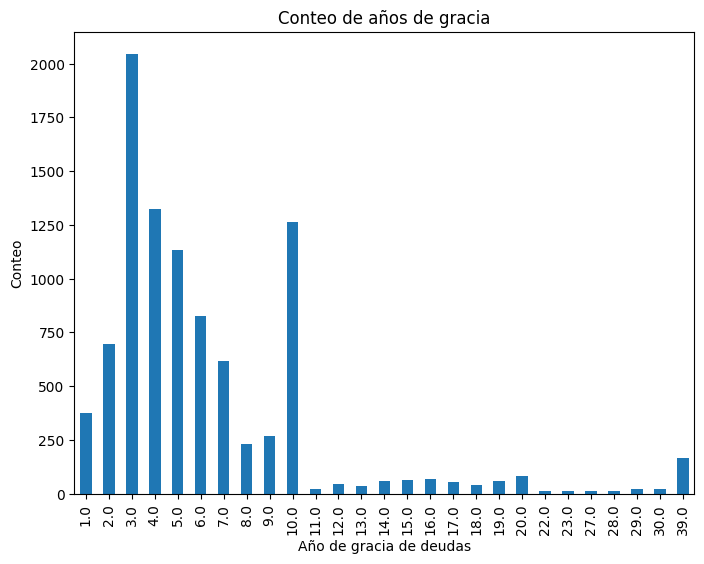

In [121]:
import matplotlib.pyplot as plt

conteo = df['anhosGracia'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
conteo.plot(kind='bar')
plt.xlabel('Año de gracia de deudas')
plt.ylabel('Conteo')
plt.title('Conteo de años de gracia')
plt.show()



*   Como se puede observar como el año 3 tiene la mayor cantidad y el año 28 la menor cantidad de registros con años de gracia, significa que en el conjunto de datos hay más préstamos con un período de gracia de 3 años y menos préstamos con un período de gracia de 28 años.



Gráfico de barras con las cantidades de años de gracia, pero solo para los registros donde el nombreBeneficiario sea "MIN. DE HACIENDA":

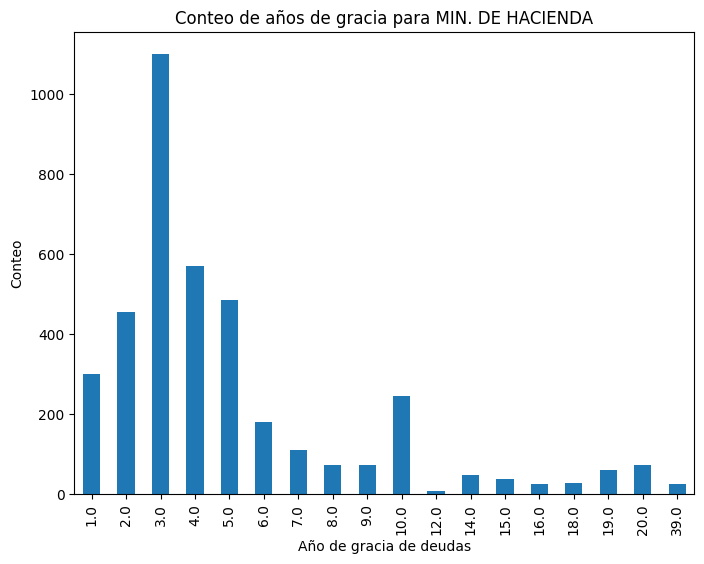

In [122]:
import matplotlib.pyplot as plt

df_min_hacienda = df[df['nombreBeneficiario'] == "MIN. DE HACIENDA"]
conteo_min_hacienda = df_min_hacienda['anhosGracia'].value_counts()

plt.figure(figsize=(8, 6))
conteo_min_hacienda.sort_index().plot(kind='bar')
plt.xlabel('Año de gracia de deudas')
plt.ylabel('Conteo')
plt.title('Conteo de años de gracia para MIN. DE HACIENDA')
plt.show()



*   Se realizó este gráfico para poder ver los años de gracia de los registros del Ministerio de Hacienda, ya que se encuentra en el top 1 con el monto de prestamos mas alto en comparacion a otros beneficiarios. Como el gráfico anterior dios resultados parecidos en cuanto a la mayoría de los registros contaban con un periodo de gracia de 3 años, en cambio la menor cantidad de registros cuenta con un periodo de gracia de 12 años.



## Conclusión

En este proyecto, se realizó un análisis de datos sobre la deuda pública del gobierno de Paraguay. A través de la preparación de los datos, se realizaron transformaciones y manipulaciones para asegurar que estuvieran en un formato adecuado y listos para su análisis. Se exploraron diferentes variables y se calcularon medidas estadísticas como la suma, media, mediana, mínimo y máximo de los montos de préstamo.

Se observó que los montos de los préstamos presentan una amplia variabilidad, con una diferencia significativa entre el mínimo y el máximo.

Además, se llevó a cabo un análisis inferencial mediante la realización de pruebas de hipótesis y la construcción de intervalos de confianza. Estas técnicas permitieron realizar inferencias sobre los montos de préstamo y obtener conclusiones más allá de los datos observados.

Por otro lado, se exploró la correlación entre diferentes variables y se encontraron relaciones moderadas entre el monto del préstamo y variables como la tasa de interés, el año inicial del préstamo y los años de gracia.

En cuanto a los años de gracia, se observó que el año 3 presentó la mayor cantidad de préstamos con este período, mientras que el año 28 mostró la menor cantidad.

Tambien cabe resaltar del hallazo en cuanto a la cantidad de resgitros sin mobre de beneficiarios que se situaba en el top 3 de mayores montos de préstamos. Y en el top 1 el Ministerio de Hacienda con una diferencia masiva en comparación a los demás beneficiarios.

Este proyecto de análisis de la deuda pública de Paraguay proporcionó una visión general de los montos de préstamo, sus características y relaciones con otras variables. Los resultados obtenidos pueden ser utilizados para tomar decisiones informadas en relación con la gestión de la deuda y brindar información relevante para futuros análisis y toma de decisiones.

## Diccionario

categoriaDeuda: La categoría de la deuda según algún criterio establecido.

categoriaDeudor: La categoría del deudor asociado a la deuda.

monedaBasePrestamo: La moneda base en la que se otorgó el préstamo.

descripcionTipoAdministracion: Descripción del tipo de administración relacionado con la deuda.

deudor: El deudor asociado a la deuda.

duracion: La duración del préstamo en meses o años.

fechaFinalProgramada: La fecha final programada para el préstamo.

fechaInicialProgramada: La fecha inicial programada para el préstamo.

fuenteDeuda: La fuente de la deuda, es decir, la entidad o institución que otorga el préstamo.

garantiaPublica: Indicador de si la deuda cuenta con garantía pública.
tipoPrestamo: El tipo de préstamo otorgado.

institucionPagadora: La institución que realiza los pagos asociados a la deuda.

montoPrestamo: El monto del préstamo otorgado.

nombreBeneficiario: El nombre del beneficiario asociado a la deuda.

nombreAcreedor: El nombre del acreedor o prestamista asociado a la deuda.

paisAcreedor: El país del acreedor o prestamista asociado a la deuda.

periodoGracia: El período de gracia, es decir, el tiempo durante el cual no se realizan pagos o se pagan intereses solamente.

situacion: La situación actual de la deuda.

tasaInteres: La tasa de interés aplicada al préstamo.

tipoAcreedor: El tipo de acreedor o prestamista asociado a la deuda.

anhoInicial: El año inicial del préstamo.

mesInicial: El mes inicial del préstamo.

diaInicial: El día inicial del préstamo.

anhoFinal: El año final del préstamo.

mesFinal: El mes final del préstamo.

diaFinal: El día final del préstamo.

anhosGracia: El número de años de gracia para el préstamo.

